In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
from matplotlib.ticker import MaxNLocator
warnings.filterwarnings('ignore') 
sns.set_style("whitegrid")

# Update rcParams in mpl
rcParams = {
        'font.size': 20,                # all fonts-size in plot
        'font.weight': 'bold',          # bold all fonts
        'figure.titleweight': 'bold',   # bold supertitle
        'axes.linewidth' : 6,
        'xtick.major.width': 6,
        'axes.spines.top': True,
        'axes.spines.right': True,
        'lines.linewidth': 6,
        'legend.fontsize': 'large',
        'xtick.labelsize': 'large',
        'ytick.labelsize': 'large',
        'xtick.labelsize': 20,   # sets x-tick font size
        'ytick.labelsize': 20,
        'axes.titlepad': 20,   # spacing between suptitle and figure
        'axes.facecolor': 'white'
    }

# import Adhoc module
from iontra_tools.data import fetch, parse
from iontra_tools.deimos_cal import database
from parse_compact import parse_bz2
from adhoc_analysis import Adhoc
from CycloidConnector import VWCycloid 

# Lets initialize the Adhoc class
adhoc = Adhoc()

# print all available methods in adhoc
#print([method for method in dir(adhoc) if not method.startswith('__')])

# Lets initialize VWCycloid class
redshift = VWCycloid() 


## Plot Rover Metrics

##### Read Timeseries Rover Data

In [12]:
data_file_path = 'control_instance11.csv' # copy and paste your data file path here
dfr = adhoc.read_data(data_file_path).reset_index(drop = True)
# iontra_control.csv
# testPackFultonv670Modified.csv

The unique does in the data: ['MTSOWPhase2_Pack25CValidation']

The unique instances in the data: [11]

The range of cycles in the data: (199, 206)


#### Filter Timeseries data if needed
You can filter the data by:
1) List of DoEs: filter_by_doe(self, df: pd.DataFrame, doe_list: list) -> pd.DataFrame
2) List of Instances: filter_by_instance(self, df: pd.DataFrame, instance_list: list) -> pd.DataFrame
3) List of cycles: filter_by_cycle(self, df: pd.DataFrame, cycle_list: list) -> pd.DataFrame
4) List of (doe, instance) tuple: filter_by_doe_instance(self, df: pd.DataFrame, doe_instance_tuple) -> pd.DataFrame

In [23]:
# filter by instance
# dfrr = adhoc.filter_by_instance(dfr, [25])

# filter by cycle
dfrr = adhoc.filter_by_cycle(dfr, [202, 203, 204, 205])

# filter by doe
# df = adhoc.filter_by_doe([359, 7014])

# Filter by doe and instance pair
# dfr = adhoc.filter_by_doe_instance(dfr, [('testPackFultonv670', 44), ('testPackFultonv670', 46), ('testRemotePack', 'd71'), ('testRemotePack', 'e71')])

dfrr.head(5)

,doe,instance,cycle_num,charging_state,charging_state_name,local_time,elapsed_minutes,avail_battery_capacity_ah,avg_current_a,avg_voltage_v,battery_temperature_deg_c
0,MTSOWPhase2_Pack25CValidation,11,202,0,CHARGE,1716315088966,0.000000,NaN,NaN,NaN,NaN
1,MTSOWPhase2_Pack25CValidation,11,202,0,CHARGE,1716315089253,0.004783,NaN,NaN,NaN,NaN
2,MTSOWPhase2_Pack25CValidation,11,202,0,CHARGE,1716315089254,0.004800,2.638908e-07,-1.301422,16.481995,27.0
3,MTSOWPhase2_Pack25CValidation,11,202,0,CHARGE,1716315089748,0.013033,2.909437e-03,-21.375702,17.665924,27.0
4,MTSOWPhase2_Pack25CValidation,11,202,0,CHARGE,1716315090252,0.021433,5.897552e-03,-21.505844,17.733582,27.0


#### Plot Select Rover Metric
When done selecting desired metrics, press 0 to end the selection and continue plotting. <br>
Use adhoc.plot_rover_metrics(df, hue = '???', label_title = '???', suptitle = '???')<br>
For hue, use either instance, cycle_num or doe_instance.

In [24]:
# Call the methods to perform operations and plot data 
# default x = 'elapsed_minutes', you can change x to 'avail_battery_capacity_ah' 
# to plot metrics like avg_current_a, avg_voltage_v, battery_temperature_deg_c 
# as a function of SoC
"""def plot_rover_metrics(self, df: pd.DataFrame, x:str = 'elapsed_minutes', charging_state_name: str = 'CHARGE',
hue: str = None, suptitle: str = None, label_title: str = None, legend: bool = True) -> None"""

adhoc.plot_rover_metrics(dfrr, x = 'elapsed_minutes', charging_state_name = 'CHARGE', hue = 'cycle_num', label_title = 'Cycle Number', 
suptitle = 'MTSOWPhase2_Pack25CValidation_11 Charge Current, Voltage, Capacity and Temperature') 

Available metrics:
1.avg_current_a
2.avg_voltage_v
3.avail_battery_capacity_ah
4.battery_temperature_deg_c
5.min_current_a
6.max_current_a
7.min_voltage_v
8.max_voltage_v
9.current_a
10.voltage_v


### Plot Cycloid Data
#### Read Cycloid Data

In [2]:
# Please provide user input here
doe_number = 'MTSOWPhase2_Pack25CValidation'    # provide doe as int or str
instance_number = None     # provide a list of instances
cycles = None    # please provide a list of cycles
default_columns = True # If True, pulls all the columns
override_query = None   # You can write your own SQL query if you like

In [3]:
dfc = redshift.get_cycloid_data(doe = doe_number, instances = instance_number, 
cycles = cycles, default_columns = default_columns, override_query =  override_query)
dcir = adhoc.get_dcir(dfc)
discharge_energy = adhoc.get_discharge_energy(dfc)

print("\n **************The DCIR DataFrame preview *********************: \n", dcir.head(1),
    '\n*****************************************************************')
print("\n ******The Discharge Energy DataFrame preview ******************************: \n", discharge_energy.head(1),
      '\n ***************************************************************************')

Status: PICKED
Status: STARTED
Status: FINISHED
QUERY FINISHED.


Aggregating Results for DoE MTSOWPhase2_Pack25CValidation: 100%|██████████| 99376/99376 [01:14<00:00, 1333.96lines/s]


Frame created successfuly.

 **************The DCIR DataFrame preview *********************: 
                       doe_number  instance_number  cycle  dcir
0  MTSOWPhase2_Pack25CValidation                1      1  36.1 
*****************************************************************

 ******The Discharge Energy DataFrame preview ******************************: 
                       doe_number  instance_number  cycle  discharge_energy  \
0  MTSOWPhase2_Pack25CValidation                1      1        105.421804   

   mean_energy  std_energy  lower_energy_bound  norm_discharge_energy  \
0   105.684802    3.759149           94.407356               0.999034   

   norm_mean_energy  norm_lower_energy  
0          0.998332           0.941498   
 ***************************************************************************


##### Plot DCIR, Cell/Pack Voltage
1. To plot dcir, use plot_dcir(self, df: pd.DataFrame, hue: str = 'instance', label_title: str = 'Instance Number') method. <br>
You need to pass only cycloid DataFrame.
2. To plot Cell/Pack mean charge voltage, use plot_mean_voltage(self, df: pd.DataFrame, hue: str = 'instance', <br>
charging_state_name: str = 'CHARGE', label_title: str = 'Instance Number'). You need to pass the cycloid DataFrame and <br>
other optional parameters.

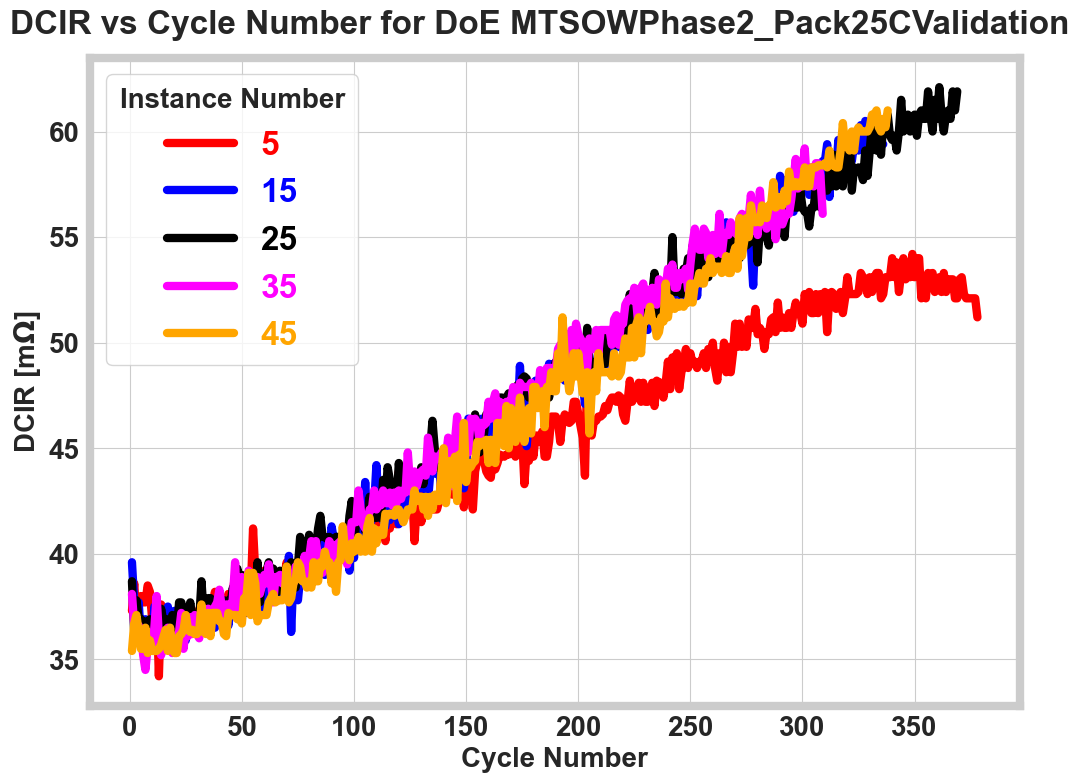

In [29]:
adhoc.plot_dcir(dfc[dfc['instance_number'].isin(np.arange(5, 48, 10))])
# plt.gca().get_legend().remove()
# plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.suptitle('DCIR vs Cycle Number for DoE MTSOWPhase2_Pack25CValidation')
plt.subplots_adjust(top = 0.92)

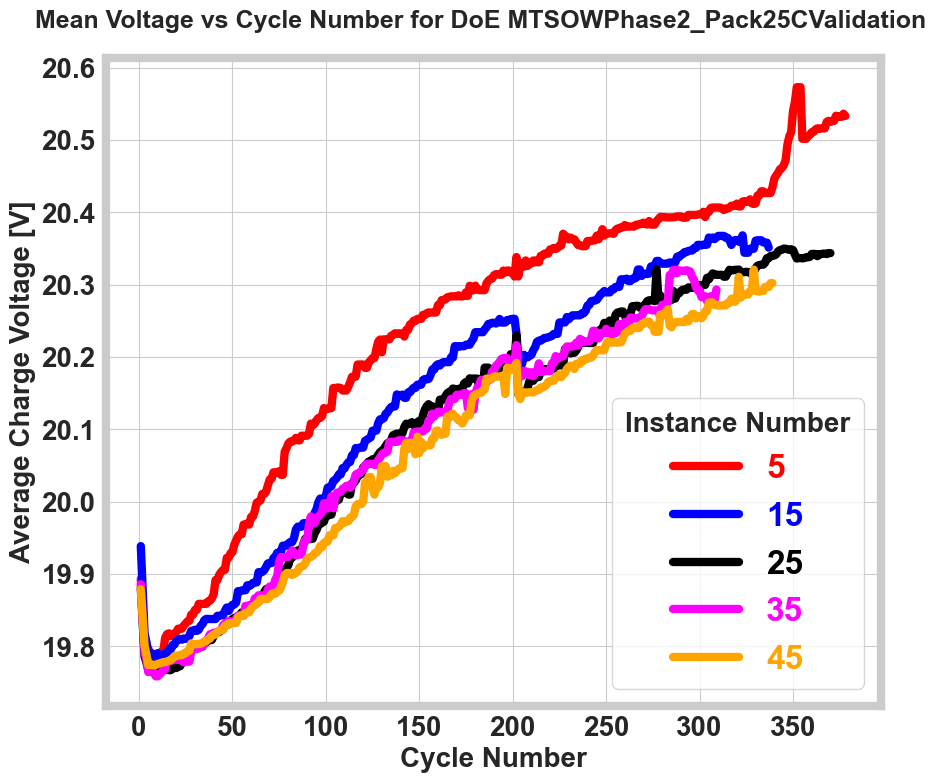

In [41]:
""" 
def plot_mean_voltage(self, df: pd.DataFrame, hue: str = 'instance_number', 
    charging_state_name: str = 'CHARGE', label_title: str = 'Instance Number', 
    raw_data = True, window: int = 5, sigma_multiplier: float = 0.2, ax = None) -> None
"""
adhoc.plot_mean_voltage(dfc[dfc['instance_number'].isin(np.arange(5, 48, 10))], raw_data = False)
# plt.gca().get_legend().remove()
plt.suptitle('Mean Voltage vs Cycle Number for DoE MTSOWPhase2_Pack25CValidation', fontsize = 18)
plt.subplots_adjust(top = 0.92)

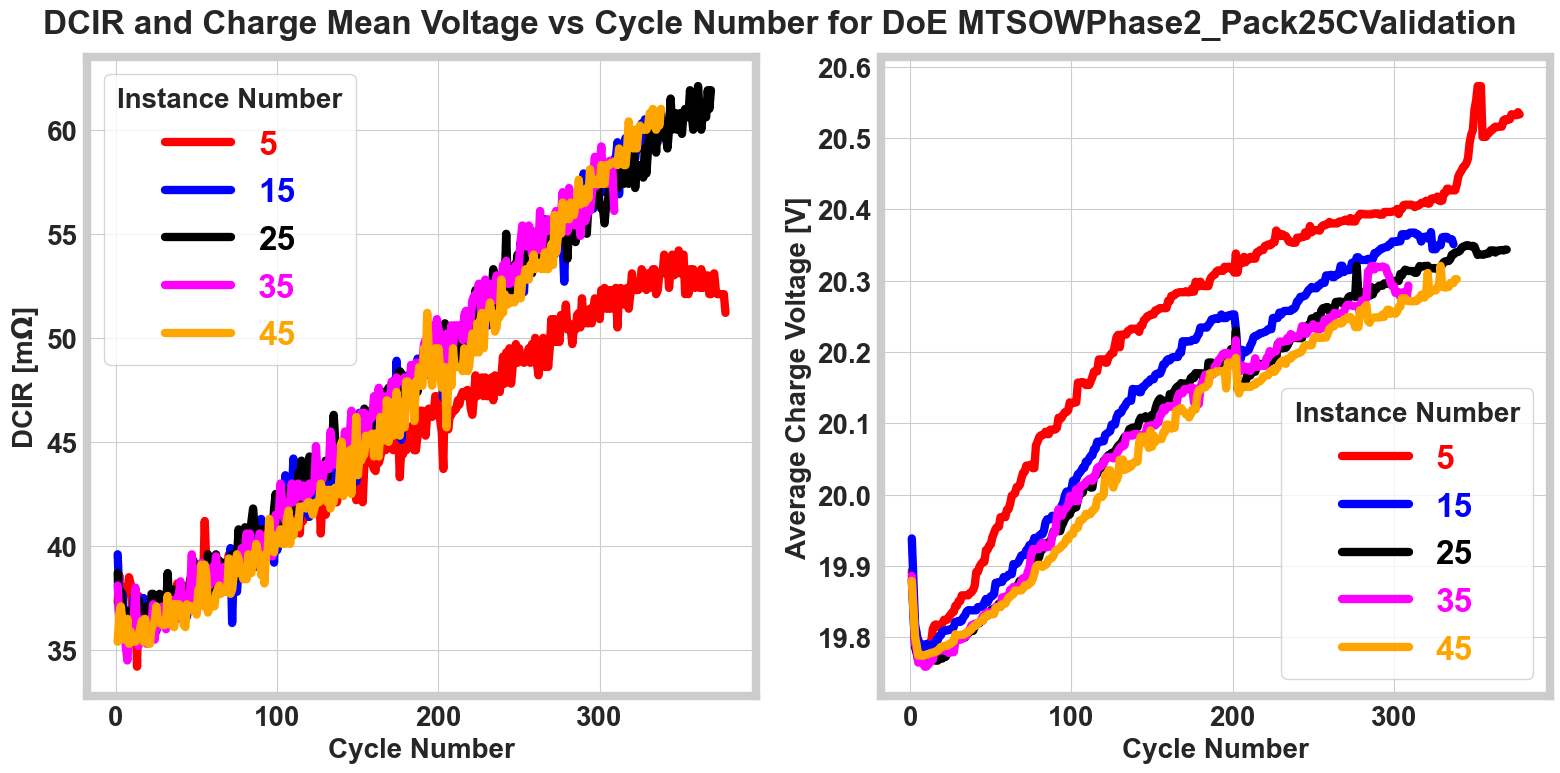

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (16, 8))

adhoc.plot_dcir(dfc[dfc['instance_number'].isin(np.arange(5, 48, 10))], ax = ax[0])

adhoc.plot_mean_voltage(dfc[dfc['instance_number'].isin(np.arange(5, 48, 10))], ax = ax[1], raw_data = False)

plt.tight_layout()

# ax[0].get_legend().remove()
# ax[1].get_legend().remove()
plt.suptitle('DCIR and Charge Mean Voltage vs Cycle Number for DoE MTSOWPhase2_Pack25CValidation')
plt.subplots_adjust(top = 0.92)

### Plot Cycloid Cells Voltage and their Std

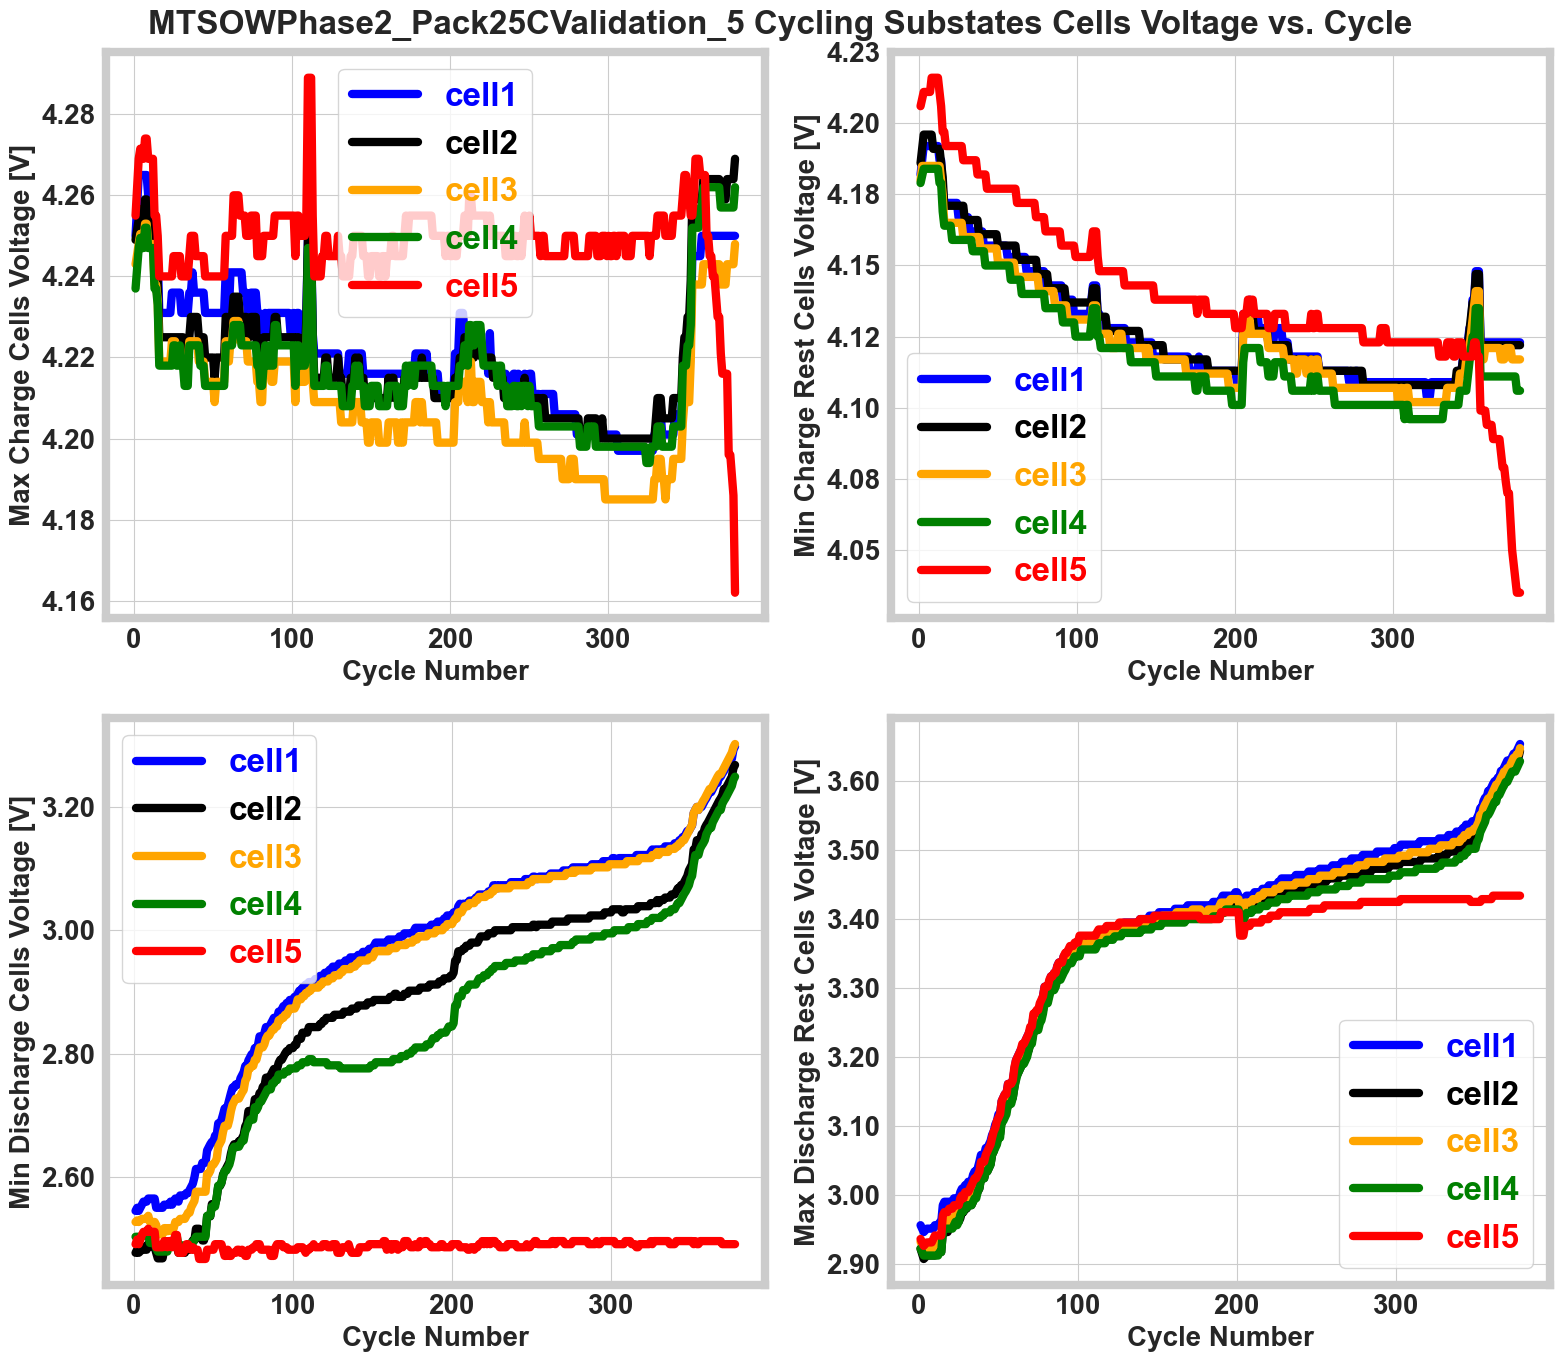

In [65]:
""" 
def plot_cells_voltage(self, df: pd.DataFrame, instance_number: Union[int, str] = None, 
        raw_data = True, window: int = 5, sigma_multiplier: Union[float, int] = 0.1)

        Plot voltage data for different cycling states.
        Parameters:
            df (DataFrame): Input cycloid DataFrame containing voltage data.
            instance_number (int or str): Instance number to plot (default is None).
            raw_data (bool): If True, plots raw data. If False, plots clean data.
            window (int): Window size for rolling median and standard deviation (default is 5).
            sigma_multiplier (float): Sigma multiplier for outlier detection (default is 0.1).
        
        Returns:
            None: Displays a 2 * 2 plot with cells voltage for each cycling substate.
"""

adhoc.plot_cells_voltage(dfc[dfc['instance_number'] == 5], raw_data = False)

Status: PICKED
Status: STARTED
Status: FINISHED
QUERY FINISHED.


Aggregating Results for DoE MTSOWPhase2_Pack25CValidation: 100%|██████████| 100300/100300 [01:19<00:00, 1255.93lines/s]


Frame created successfuly.


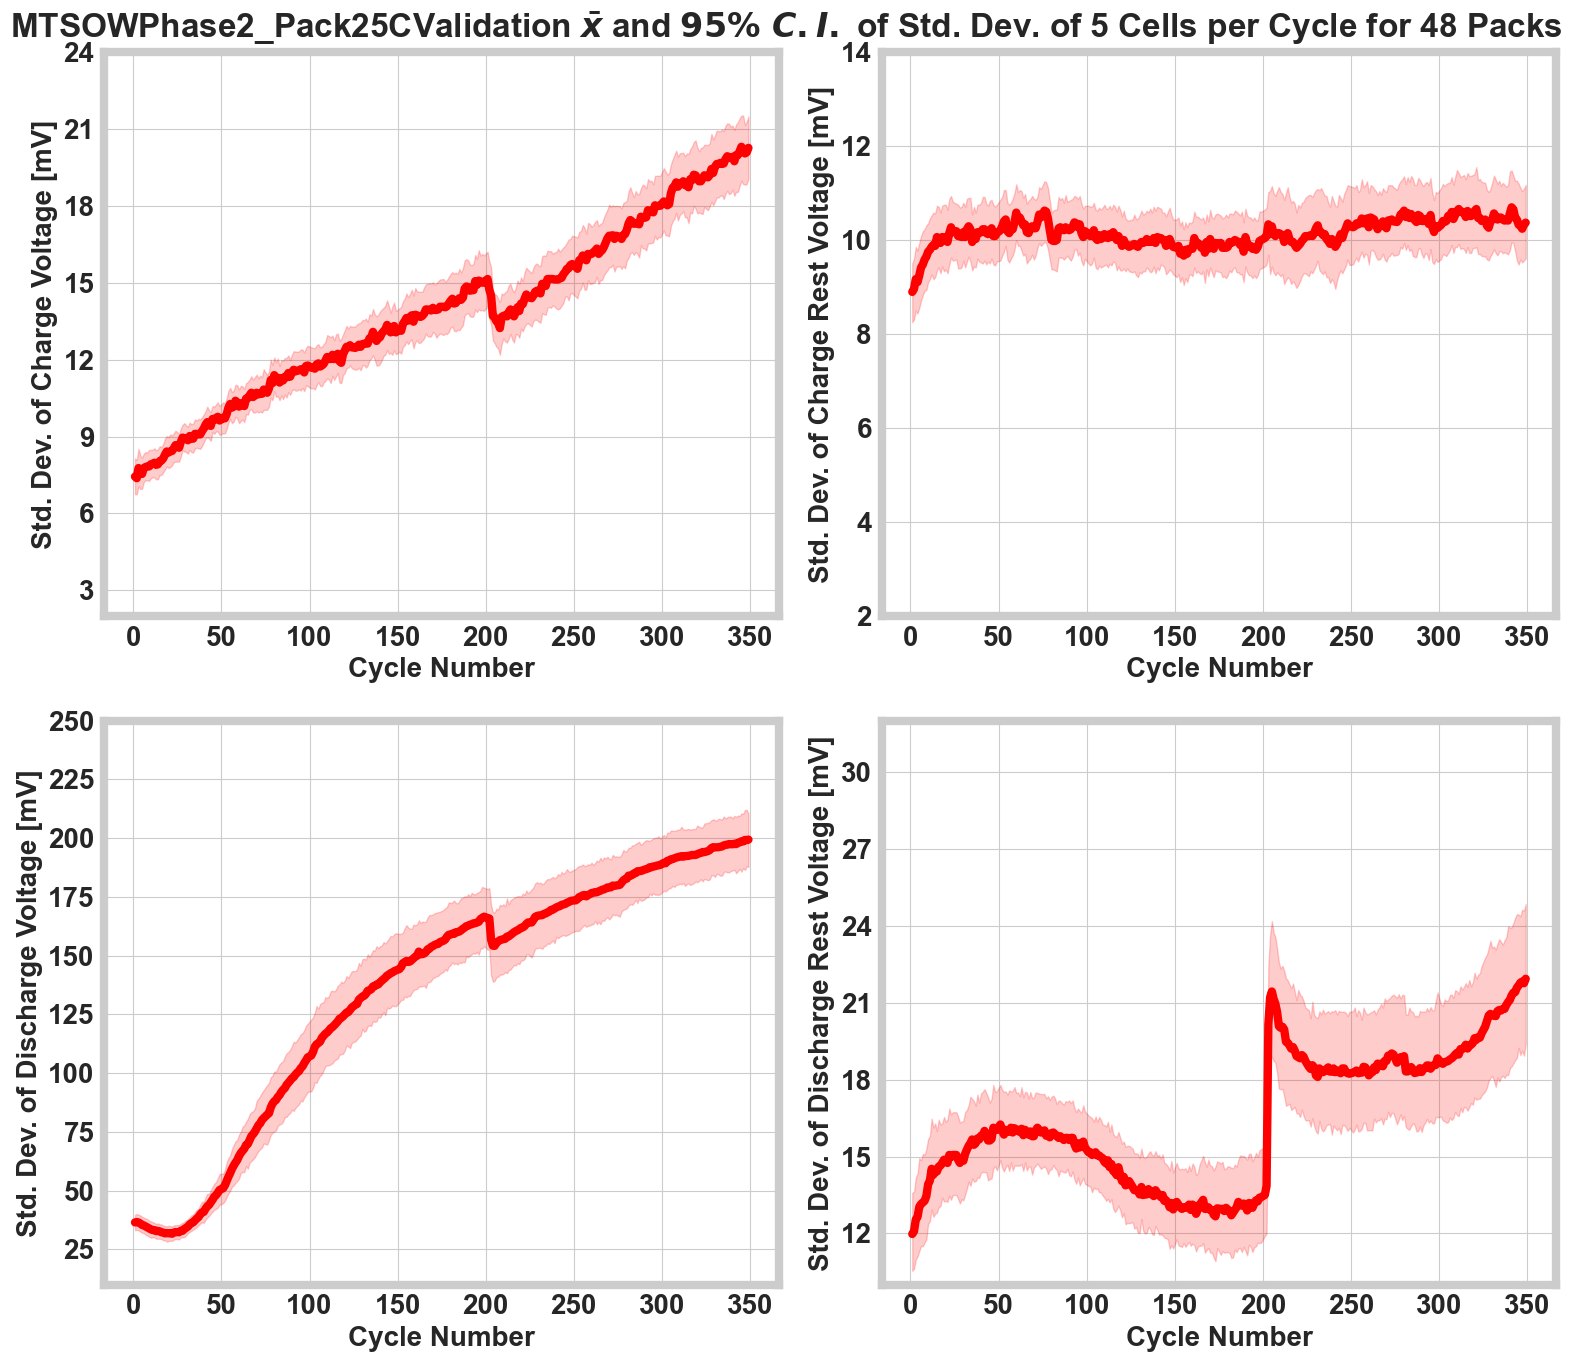

In [3]:
for doe in ['MTSOWPhase2_Pack25CValidation', 'MTSOWPhase2_OLDPack25CValidation', 'MTSOWPhase2_Pack25CControl']:
    data = redshift.get_cycloid_data(doe = doe, default_columns = True, cycles = np.arange(1, 351))
    data = data[data['cycle'] % 25 != 0]
    
    adhoc.plot_cells_voltage_std(data)
    break

#### Plot Energy and its Bounds

Status: PICKED
Status: FINISHED
QUERY FINISHED.


Aggregating Results for DoE 356: 100%|██████████| 30192/30192 [00:03<00:00, 9462.70lines/s]



Frame created successfuly.
Status: PICKED
Status: FINISHED
QUERY FINISHED.


Aggregating Results for DoE 327: 100%|██████████| 27353/27353 [00:03<00:00, 8702.82lines/s]



Frame created successfuly.


Text(0.5, 1.0, 'DoE 7018 (5 replicates) Contrasted to  Reference DoE327 (5 replicates)')

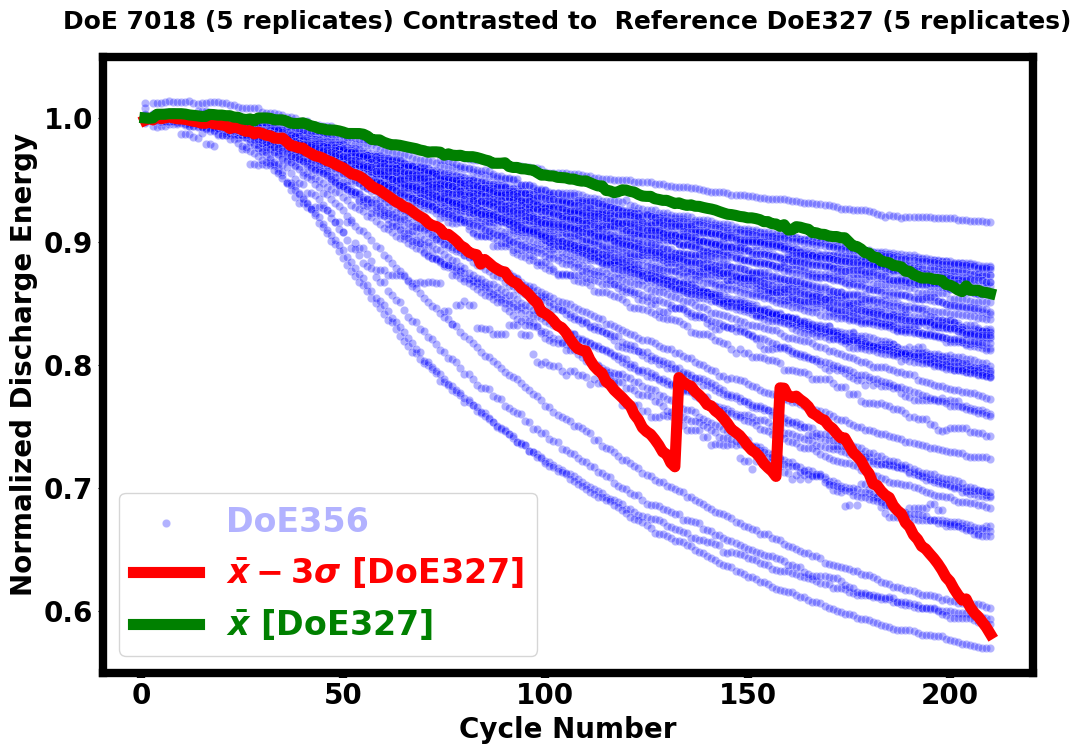

In [9]:
# Provide two doe's as user input
test_doe = 356
ref_doe = 327
# instance_number = np.arange(1, 6)     # provide a list of instances
# cycles = None    # please provide a list of cycles
# default_columns = False # If True, pulls all the columns
# override_query = None   # You can write your own SQL query if you like

##################################################################################################################################
plt.figure(figsize = (12, 8))
test = adhoc.get_discharge_energy(redshift.get_cycloid_data(doe = test_doe))
ref = adhoc.get_discharge_energy(redshift.get_cycloid_data(doe = ref_doe))

sns.scatterplot(data = test, x = 'cycle', y = 'norm_discharge_energy', color = 'blue', alpha = 0.3, label = 'DoE356')
sns.lineplot(data = ref, x = 'cycle', y = 'norm_lower_energy', color = 'red', linewidth = 8.0, label = r'$\bar{x} - 3\sigma$ [DoE327]')
sns.lineplot(data = ref, x = 'cycle', y = 'norm_mean_energy', color = 'green', linewidth = 8.0, label = r'$\bar{x}$ [DoE327]')
plt.ylim([0.55, 1.05])
plt.ylabel("Normalized Discharge Energy")
plt.xlabel("Cycle Number")
plt.legend(labelcolor = 'linecolor')
plt.title("DoE 356 (48 replicates) Contrasted to  Reference DoE327 (5 replicates)", fontdict = {'weight': 'bold', 'fontsize': 18})

### Plot Pack Heating (Max Temperature)

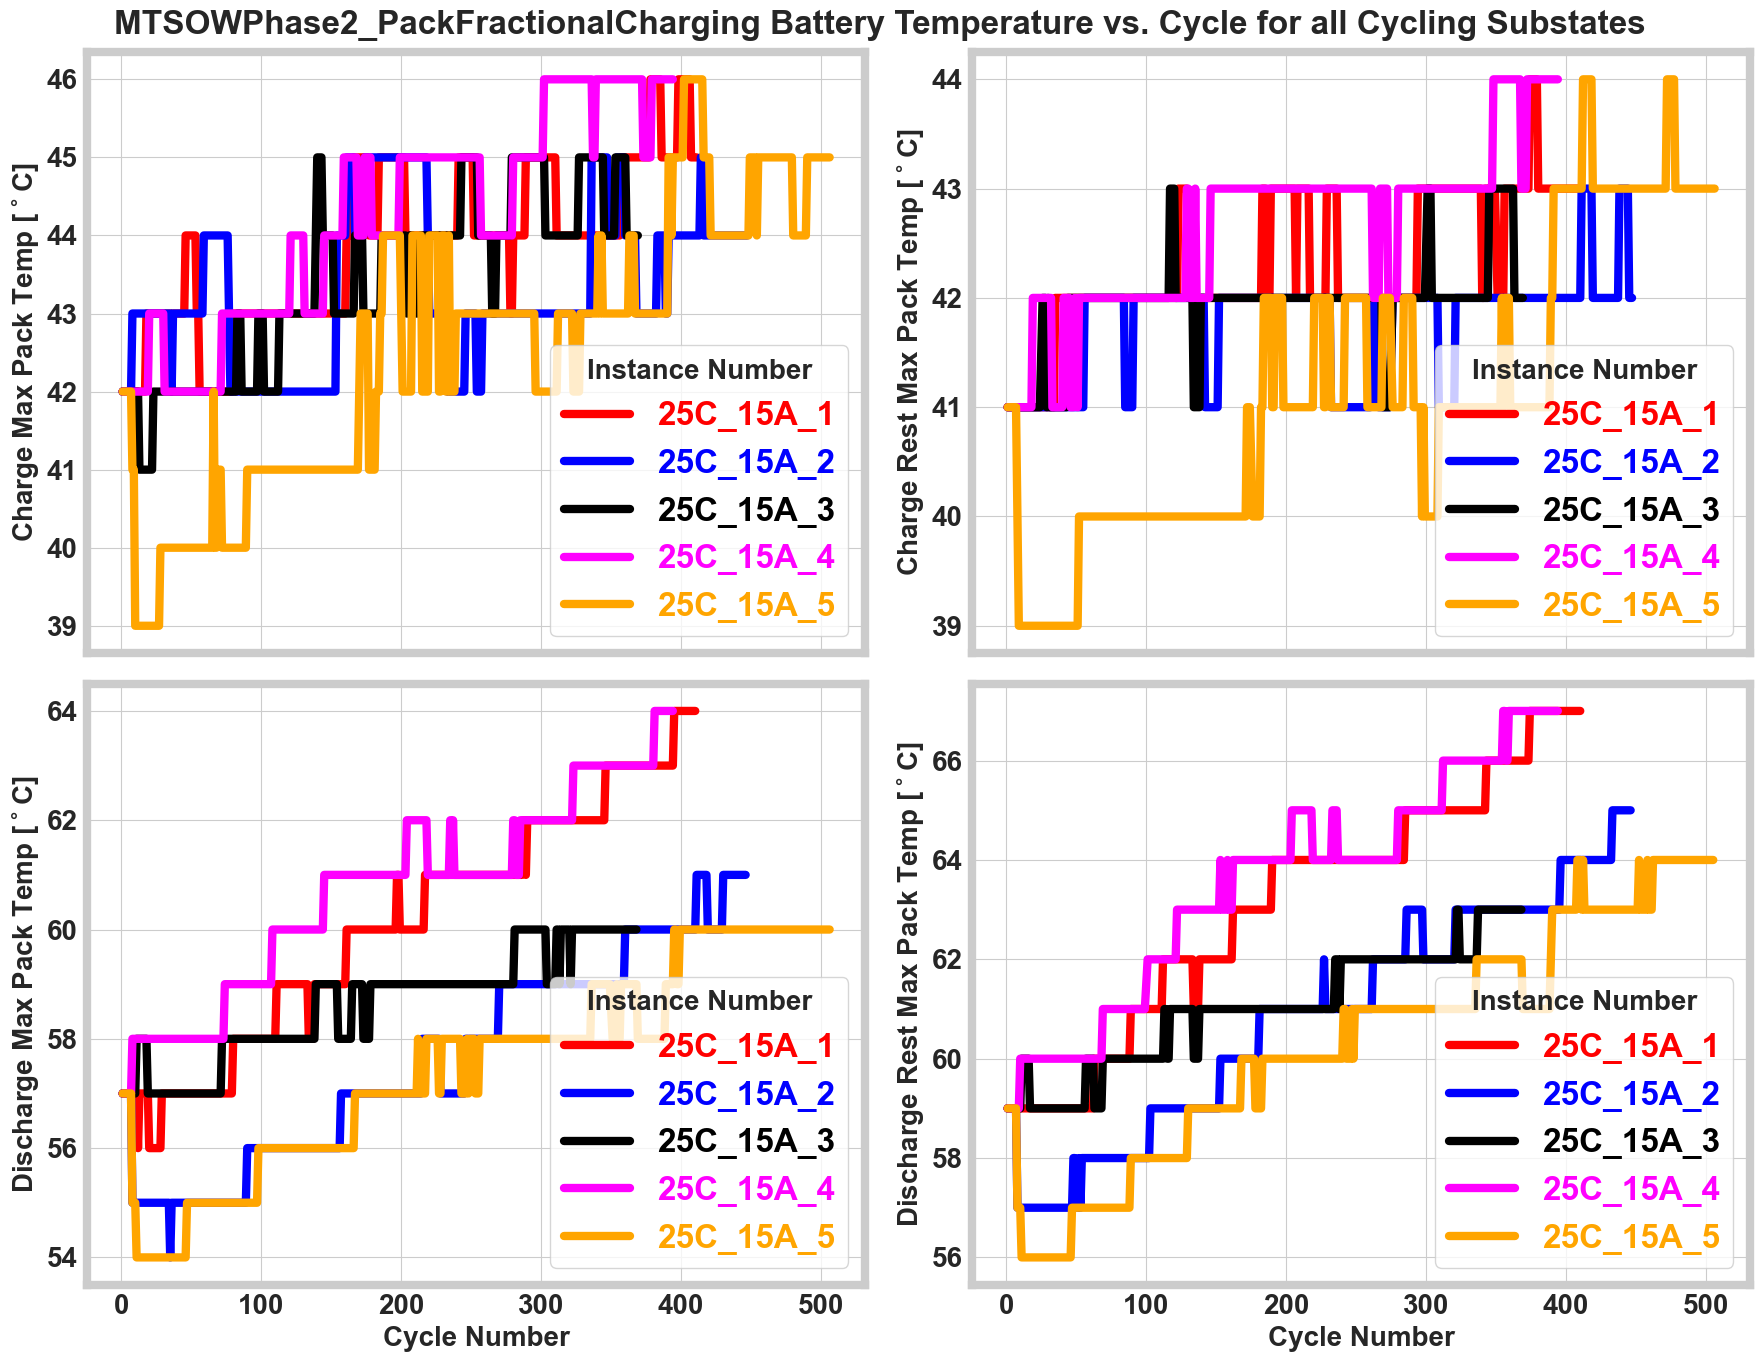

In [5]:
"""
def plot_temperature(self, df: pd.DataFrame, x: str = 'cycle', y: str = 'max_temp', hue: str = 'instance_number',
clean_first_n_cycles: int = 5, window: int = 7, sigma_multiplier: Union[int, float] = 0.5, sharex: bool = True) -> None
If comparing instances across multiple does, create doe_instance column and use it as hue = 'doe_instance'
"""  
adhoc.plot_temperature(df = data)


## Data Fitting

In [9]:
data = pd.read_csv('control_validation_de.csv')

In [3]:
len(data[data['doe_number'] == 'MTSOWPhase2_Pack25CControl'].instance_number.unique())

48

In [20]:
def outlier_handler(series: pd.Series, window: int = 5, sigma_multiplier : float = 0.1) -> pd.Series:
    """
    Handle outliers in a pandas Series.

    Parameters:
        series (pd.Series): The input Series.
        sigma_multiplier (float): Defines the boundary for outliers.

    Returns:
        pd.Series: Series with outliers handled.
    """
    roll = series.rolling(window = window, min_periods = 1)
    md = roll.median()
    sd = roll.std(ddof = 0)
    z_score = (series - md) / sd
    series[(z_score < - sigma_multiplier) | (z_score > sigma_multiplier)] = md
    return series

In [5]:
data = data.groupby(['doe_number', 'instance_number']).filter(lambda group: ((group['norm_discharge_energy'].min() > 0.64) & (group['norm_discharge_energy'].max() < 1.05) & (group['cycle'].max() > 250)))

In [6]:
data['norm_discharge_energy'] = data.groupby(['doe_number', 'instance_number'])['norm_discharge_energy'].transform(lambda series: outlier_handler(series, window = 7, sigma_multiplier = 0.015))

In [53]:
from sklearn.metrics import r2_score

def fit_energy_and_find_cycle(df, target_energy, start_index = None, end_index = None, max_degree = 5):
    # use the entire range by default
    if start_index is None:
        start_index = 0
        if end_index is None:
            end_index = len(df)
    # Select the specified range of data points
    selected_data = df.iloc[start_index:end_index]

    best_degree = 1
    best_r2 = -np.inf
    best_poly = None

    for deg in range(1, max_degree + 1):
        coefficients = np.polyfit(selected_data['cycle'], selected_data['norm_discharge_energy'], deg = deg)
        fitted_poly = np.poly1d(coefficients)
        predicted_y = fitted_poly(selected_data['cycle'])
        r2 = r2_score(selected_data['norm_discharge_energy'], predicted_y)

        if r2 > best_r2:
            best_r2 = r2
            best_degree = deg
            best_poly = fitted_poly

        # Find the roots of the best polynomial function corresponding to the target y
        def find_cycle(target_energy):
            # adjust the polynomial by subtracting target_energy
            roots = (best_poly - target_energy).roots
            # Filter real roots
            real_roots = roots[np.isreal(roots)].real
            # Return all the real roots
            return int(real_roots) if best_degree == 1 else [int(roots) for roots in real_roots]
        
        target_cycle = find_cycle(target_energy)

        return pd.Series({'target_cycle': target_cycle, 'fitted_poly': fitted_poly, 'best_degree': best_degree, 'r2_score': r2})
    
# Example usage
n = 30  # last fifty cycles only
result = data.groupby(['doe_number', 'instance_number']).apply(lambda group: fit_energy_and_find_cycle(group, 0.64, len(group) - n, len(group))).reset_index()

In [54]:
result.to_excel("MTSOWPhase2_Pack25CControl_MTSOWPhase2_Pack25CValidation_target_cycle_extrapolation.xlsx", index = False)

In [55]:
result = result[result['r2_score'] > 0.90].reset_index(drop = True)

In [56]:
result_c = result[result['doe_number'] == 'MTSOWPhase2_Pack25CControl']
result_v = result[result['doe_number'] == 'MTSOWPhase2_Pack25CValidation']
data_c = data[data['doe_number'] == 'MTSOWPhase2_Pack25CControl']
data_v = data[data['doe_number'] == 'MTSOWPhase2_Pack25CValidation']

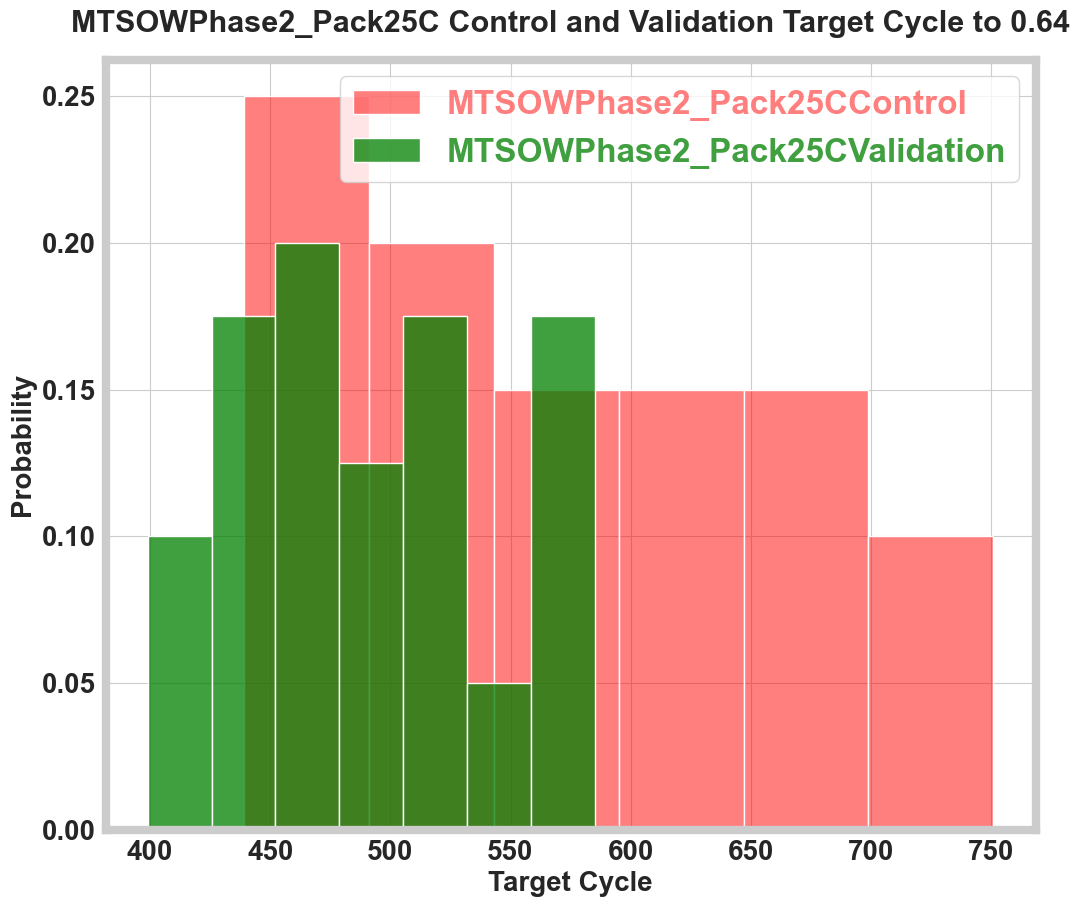

In [76]:
plt.figure(figsize = (12, 10))
sns.histplot(data = result_c, x = 'target_cycle', label = 'MTSOWPhase2_Pack25CControl', stat = 'probability', color = 'red', alpha = 0.5)
sns.histplot(data = result_v, x = 'target_cycle', label = 'MTSOWPhase2_Pack25CValidation', stat = 'probability', color = 'green')
plt.xlabel("Target Cycle")
plt.title("MTSOWPhase2_Pack25C Control and Validation Target Cycle to 0.64", fontsize = 22, fontweight = 'bold')
plt.legend(labelcolor = 'linecolor')

In [30]:
data_c = data_c[data_c['instance_number'].isin(result_c['instance_number'])]
data_v = data_v[data_v['instance_number'].isin(result_v['instance_number'])]

In [31]:
start_point_c = data_c.groupby(['doe_number', 'instance_number']).apply(lambda group: (group['cycle'].max() - 5, group.loc[group['cycle'] == group['cycle'].max()]['norm_discharge_energy'].values)).reset_index(name = 'start_point')['start_point']
end_point_c = tuple(zip(result_c['target_cycle'].values, [0.64] * len(start_point_c)))
start_point_c = start_point_c.apply(lambda x: (x[0], x[1][0]))

start_point_v = data_v.groupby(['doe_number', 'instance_number']).apply(lambda group: (group['cycle'].max() - 5, group.loc[group['cycle'] == group['cycle'].max()]['norm_discharge_energy'].values)).reset_index(name = 'start_point')['start_point']
end_point_v = tuple(zip(result_v['target_cycle'].values, [0.64] * len(start_point_v)))
start_point_v = start_point_v.apply(lambda x: (x[0], x[1][0]))

In [32]:
cycle_c = tuple(zip([start_cycle for start_cycle, _ in start_point_c], [end_cycle for end_cycle, _ in end_point_c]))
energy_c = tuple(zip([start_energy for _, start_energy in start_point_c], [end_energy for _, end_energy in end_point_c]))

cycle_v = tuple(zip([start_cycle for start_cycle, _ in start_point_v], [end_cycle for end_cycle, _ in end_point_v]))
energy_v = tuple(zip([start_energy for _, start_energy in start_point_v], [end_energy for _, end_energy in end_point_v]))

In [ ]:
data_v['norm_discharge_energy']

Text(0.5, 1.0, 'MTSOWPhase2_Pack25CValidation Normalized Discharge Energy and Linear Extrapolation to Target 0.64')

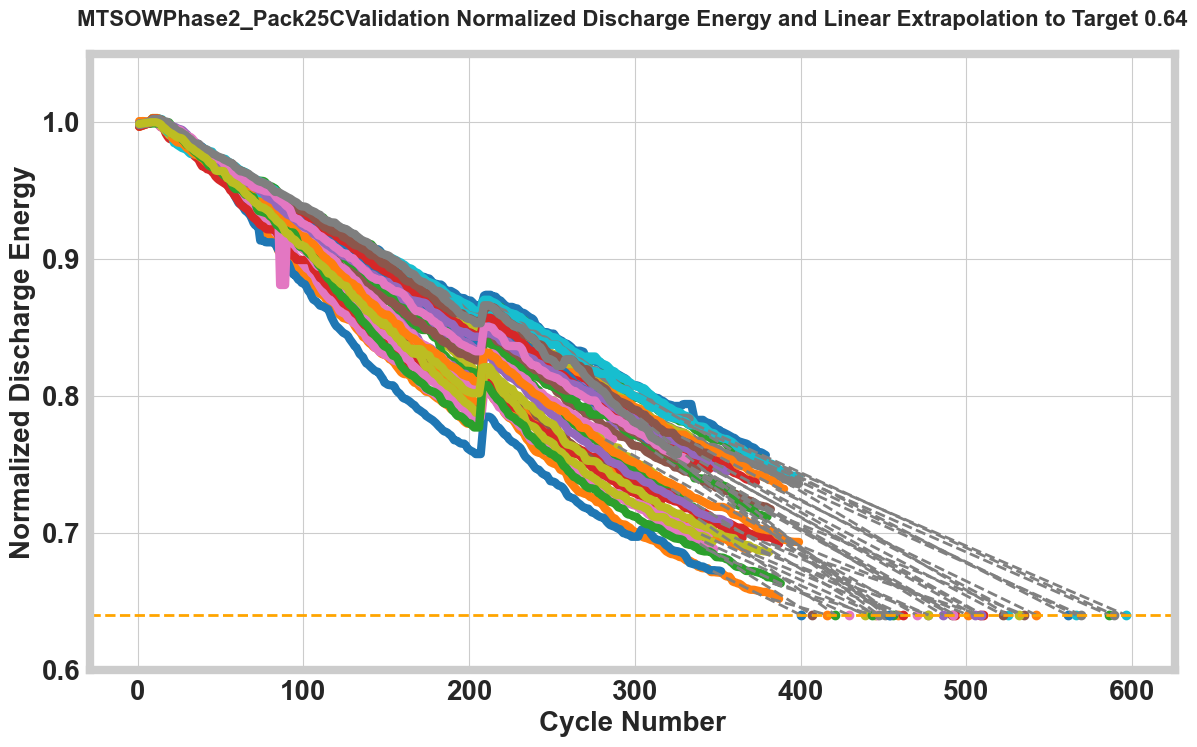

In [33]:
# plot all discharge energy
plt.figure(figsize = (14, 8))

for name, group in data_v.groupby(['doe_number', 'instance_number']):
    plt.plot(group['cycle'], group['norm_discharge_energy'])
plt.ylim([0.60, 1.05])

for name, row in result_v.iterrows():
    plt.scatter(row['target_cycle'], 0.64)

for i in range(len(cycle_v)):
    plt.plot(cycle_v[i], energy_v[i], linestyle = '--', color = 'gray', linewidth = 2.0)

plt.axhline(0.64, linestyle = '--', linewidth = '2.0', color = 'orange')
plt.xlabel('Cycle Number')
plt.ylabel('Normalized Discharge Energy')
plt.title("MTSOWPhase2_Pack25CValidation Normalized Discharge Energy and Linear Extrapolation to Target 0.64", fontsize = 16, fontweight = 'bold')

Text(0.5, 1.0, 'MTSOWPhase2_Pack25CControl Normalized Discharge Energy and Linear Extrapolation to Target 0.64')

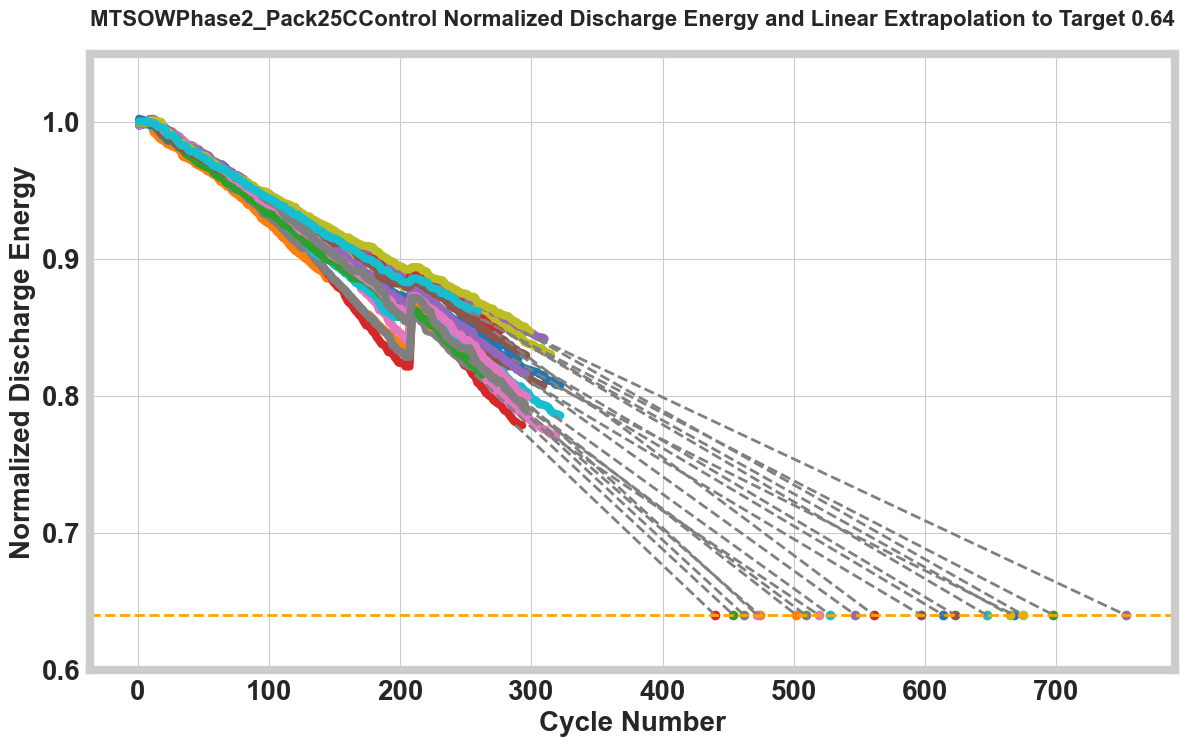

In [38]:
# plot all discharge energy
plt.figure(figsize = (14, 8))

for name, group in data_c.groupby(['doe_number', 'instance_number']):
    plt.plot(group['cycle'], group['norm_discharge_energy'])
plt.ylim([0.60, 1.05])

for name, row in result_c.iterrows():
    plt.scatter(row['target_cycle'], 0.64)

for i in range(len(cycle_c)):
    plt.plot(cycle_c[i], energy_c[i], linestyle = '--', color = 'gray', linewidth = 2.0)

plt.axhline(0.64, linestyle = '--', linewidth = '2.0', color = 'orange')
plt.xlabel('Cycle Number')
plt.ylabel('Normalized Discharge Energy')
plt.title("MTSOWPhase2_Pack25CControl Normalized Discharge Energy and Linear Extrapolation to Target 0.64", fontsize = 16, fontweight = 'bold')

In [156]:
from typing import Tuple
def remove_energy_jumps(df: pd.DataFrame, jump_threshold_pc: float = 0.2, 
    start_cycle: int = 2, closest_cycles: int = 3, jump_cycle_neighbors: int = 5) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Takes cycloid input DataFrame and returns the DataFrame with energy jumps removed and 
    a DataFrame detailing where the energy jumps occur.
     Parameters:
        df (pd.DataFrame): The input DataFrame.
        jump_threshold_pc (float): Defines what percentage of energy change between consecu-tive cycles
        is defined as jump. The cell/pack energy after resettling period usually jumps over 1.0%.
        start_cycle (int): Start looking for energy jumps after start_cycle.
        closest_cycles (int): If the jump in energy occurs within closest_cycles, then only keep the smallest
        cycle among them.
        jump_cycle_neighbors (int): Calculate the jump energy using the maximum difference in energy of range of cycle
        where jump first occurs to that cycle added with jump_cycle_neighbors.  

    Returns:
        Tuple(pd.DataFrame, pd.DataFrame): Returns the DataFrame with jump removed and Data-Frame with jump details.
    """
    processed_df_list = []
    jump_details_list = []

    for (doe, instance), group in df.groupby(['doe_number', 'instance_number']):
        
        # Calculate the percentage (its in fraction) difference in 'norm_discharge_energy'
        group['energy_diff_pct'] = group['norm_discharge_energy'].pct_change().abs()

        # Find all indices where the percentage difference exceeds the threshold
        jump_indices = group.index[group['energy_diff_pct'] > (jump_threshold_pc / 100)].tolist()

        # Filter out only jumps after the start_cycle
        jump_indices = [idx for idx in jump_indices if group.at[idx, 'cycle'] >= start_cycle]

        # Remove close jumps
        filtered_jump_indices = []
        if jump_indices:
            filtered_jump_indices.append(jump_indices[0])
            for i in range(1, len(jump_indices)):
                if group.at[jump_indices[i], 'cycle'] - group.at[filtered_jump_indices[-1], 'cycle'] < closest_cycles:
                    filtered_jump_indices[-1] = jump_indices[i]
                else:
                    filtered_jump_indices.append(jump_indices[i])

        jump_cycles = []
        jump_energies = []
        jump_energies_pct = []

        # Process each jump index
        for jump_idx in filtered_jump_indices:
            jump_cycle = group.at[jump_idx, 'cycle']
            jump_energy = group.at[jump_idx, 'norm_discharge_energy']
            jump_energy_pct = group.at[jump_idx, 'energy_diff_pct'] * 100
            jump_cycles.append(jump_cycle)
            jump_energies.append(jump_energy)
            jump_energies_pct.append(jump_energy_pct)
            
            # Get data around the jump
            data_near_jump = group[group['cycle'].between(jump_cycle - 2, jump_cycle + jump_cycle_neighbors)]['norm_discharge_energy']
            if len(data_near_jump) > 1:
                jump_length = max([data_near_jump.iloc[i] - data_near_jump.iloc[0] for i in range(1, len(data_near_jump))])

                # Adjust 'norm_discharge_energy' from the jump cycle onwards
                group.loc[group['cycle'] >= jump_cycle, 'norm_discharge_energy'] -= jump_length

            # Recalculate 'energy_diff_pct' after adjustment for remaining jumps
            group['energy_diff_pct'] = group['norm_discharge_energy'].pct_change().abs()
            # Update jump_indices for remaining jumps (if any)
            jump_indices = group.index[group['energy_diff_pct'] > (jump_threshold_pc / 100)].tolist()
            jump_indices = [idx for idx in jump_indices if idx > jump_idx and group.at[idx, 'cycle'] >= start_cycle]

        # Remove the auxiliary 'energy_diff_pct' column before returning
        group.drop(columns = ['energy_diff_pct'], inplace = True)

        # Create a DataFrame for jump cycles and energies
        jumps_df = pd.DataFrame({'doe_number': [doe] * len(jump_cycles), 'instance_number': [instance] * len(jump_cycles),
                                 'cycle': jump_cycles, 'energy': jump_energies, 'jump_energy_pct': jump_energies_pct})

        processed_df_list.append(group)
        jump_details_list.append(jumps_df)

    processed_df = pd.concat(processed_df_list).reset_index(drop=True)
    jump_details = pd.concat(jump_details_list).reset_index(drop=True)

    return processed_df, jump_details

# Example Usage
df = test.copy()  # Assuming 'test' is the original DataFrame

# Call the function
processed_df, jump_details = remove_energy_jumps(df, jump_threshold_pc = 0.1, start_cycle = 180, closest_cycles = 50)

# print("\nProcessed DataFrame:")
# print(processed_df.head())

print("\nJump Details:")
print(jump_details)



Jump Details:
                   doe_number  instance_number  cycle    energy  \
0  MTSOWPhase2_Pack25CControl                9    291  0.832206   
1  MTSOWPhase2_Pack25CControl               19    264  0.809645   
2  MTSOWPhase2_Pack25CControl               35    256  0.851799   
3  MTSOWPhase2_Pack25CControl               41    349  0.757624   
4  MTSOWPhase2_Pack25CControl               44    280  0.845053   

   jump_energy_pct  
0         0.115478  
1         0.229790  
2         0.144984  
3         0.160921  
4         0.239125  


### 06/19/2024

In [197]:
# read 25C RPT data
data = redshift.get_cycloid_data(doe = '307hot', default_columns = True)

Status: PICKED
Status: FINISHED
QUERY FINISHED.


Aggregating Results for DoE 307hot: 100%|██████████| 993/993 [00:01<00:00, 722.63lines/s]


Frame created successfuly.


In [198]:
data['delta_temp'] = data['max_temp'] - data['min_temp']

In [66]:
data307 = redshift.get_cycloid_data(doe = '307', default_columns = True, instances = ['67', '66', '65', '64', '63', '72', '70', '71', '68', '69'], cycles = np.arange(989, 1000))

Status: PICKED
Status: STARTED
Status: FINISHED
QUERY FINISHED.


Aggregating Results for DoE 307: 100%|██████████| 550/550 [00:01<00:00, 498.33lines/s]


Frame created successfuly.


In [158]:
data307[['min_temp', 'max_temp', 'delta_temp']]

,min_temp,max_temp,delta_temp
10,27.429993,45.909990,18.479997
13,27.250000,52.709990,11.100007
137,25.909988,37.009995,2.660003
317,23.629990,26.289993,29.820008
320,22.569992,52.390000,25.459990
...,...,...,...
508,22.929993,51.109985,16.440002
509,24.869995,34.030000,9.160005
512,25.809998,42.250000,1.720001
527,23.649994,25.369995,28.179992


In [199]:
data['hue'] = data['instance_number'].astype(str).apply(lambda x: x.split('_')[0])

In [200]:
# filter data into 4 groups
rpt25c = data[data['instance_number'].isin(['25CRPT_67', '25CRPT_66', '25CRPT_65', '25CRPT_64',
'25CRPT_63', '25CRPT_72', '25CRPT_70', '25CRPT_71', '25CRPT_68', '25CRPT_69'])]

rpt40c = data[data['instance_number'].isin(['40CRPT_67', '40CRPT_66', '40CRPT_65', '40CRPT_64',
'40CRPT_63', '40CRPT_72', '40CRPT_70', '40CRPT_71', '40CRPT_68', '40CRPT_69'])]

regular40c = data[data['instance_number'].isin(['40CRegular_67', '40CRegular_66', '40CRegular_65', '40CRegular_64',
'40CRegular_63', '40CRegular_72', '40CRegular_70', '40CRegular_71', '40CRegular_68', '40CRegular_69'])]

modified40c = data[(data['instance_number'].isin(['40C12ADCH_67', '40C12ADCH_66', '40C12ADCH_65', '40C12ADCH_64',
'440C12ADCH_63', '40C12ADCH_72', '40C12ADCH_70', '40C12ADCH_71', '40C12ADCH_68', '40C12ADCH_69'])) & (data['cycle'] > 1)]

#### Analyze dcir

In [46]:
dcir = adhoc.get_dcir(data)
dcir['hue'] = dcir['instance_number'].apply(lambda x: x.split('_')[0])

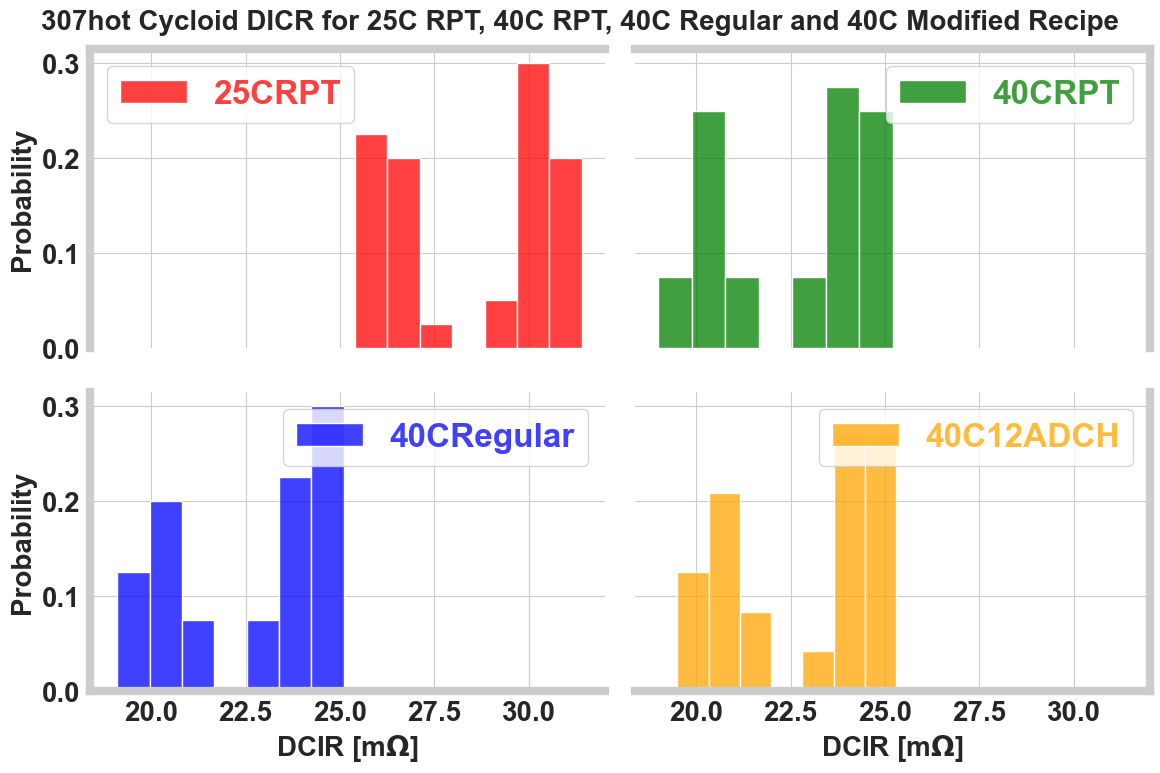

In [65]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8), sharex = True, sharey = True)
ax = ax.flatten()
sns.histplot(data = dcir[dcir.hue == '25CRPT'], x = 'dcir', label = '25CRPT', stat = 'probability', color = 'red', ax = ax[0])
sns.histplot(data = dcir[dcir.hue == '40CRPT'], x = 'dcir', label = '40CRPT', stat = 'probability', color = 'green', ax = ax[1])
sns.histplot(data = dcir[dcir.hue == '40CRegular'], x = 'dcir', label = '40CRegular', stat = 'probability', color = 'blue', ax = ax[2])
sns.histplot(data = dcir[dcir.hue == '40C12ADCH'], x = 'dcir', label = '40C12ADCH', stat = 'probability', color = 'orange', ax = ax[3])
for i in range(4):
    ax[i].legend(labelcolor = 'linecolor')
    ax[i].set_xlabel ('DCIR [m$\Omega$]')
ax[0].spines[['right', 'bottom']].set_visible(False)
ax[1].spines[['left', 'bottom']].set_visible(False)
ax[2].spines[['top', 'right']].set_visible(False)
ax[3].spines[['left', 'top']].set_visible(False)
plt.tight_layout()
plt.suptitle("307hot Cycloid DICR for 25C RPT, 40C RPT, 40C Regular and 40C Modified Recipe", fontsize = 20)
plt.subplots_adjust(top = 0.93)


## Analyze  Charge/Discharge Capacity

In [122]:
data307_charge_capacity = data307[data307['cycling_substate'] == 'CHARGE'][['instance_number', 'capacity']].groupby('instance_number').agg('median').reset_index()
rpt25c_charge_capacity = rpt25c[rpt25c['cycling_substate'] == 'CHARGE'][['instance_number', 'capacity']].groupby('instance_number').agg('median').reset_index()
rpt40c_charge_capacity = rpt40c[rpt40c['cycling_substate'] == 'CHARGE'][['instance_number', 'capacity']].groupby('instance_number').agg('median').reset_index()
regular40c_charge_capacity = regular40c[regular40c['cycling_substate'] == 'CHARGE'][['instance_number', 'capacity']].groupby('instance_number').agg('median').reset_index()
modified40c_charge_capacity = modified40c[modified40c['cycling_substate'] == 'CHARGE'][['instance_number', 'capacity']].groupby('instance_number').agg('median').reset_index()

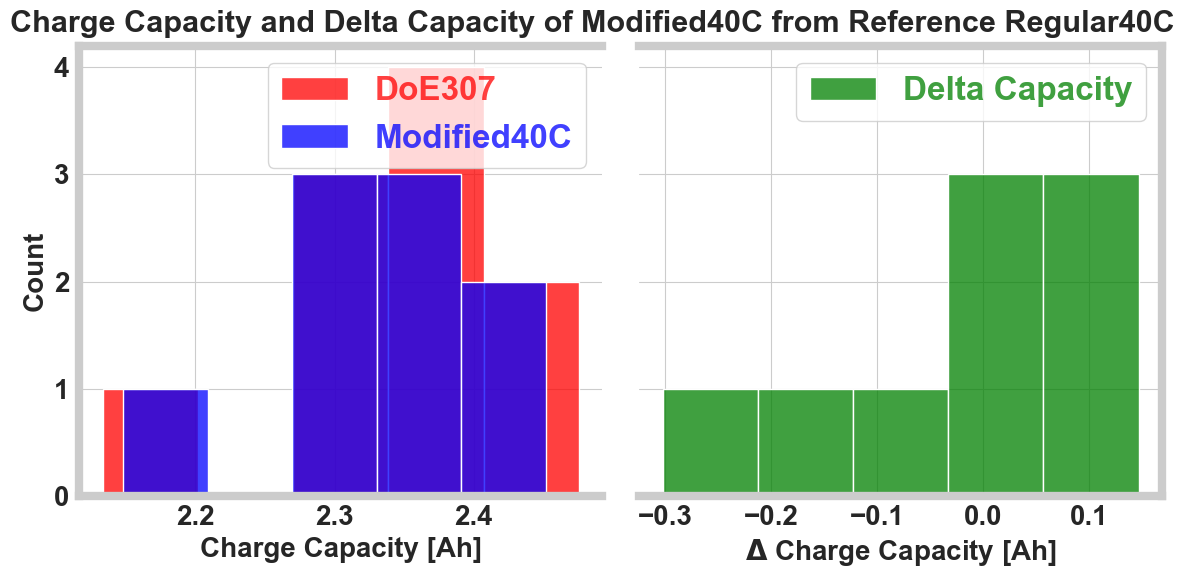

In [217]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6), sharey = True)
ax = ax.flatten()
sns.histplot(data = regular40c_charge_capacity, x = 'capacity', color = 'red', label = 'DoE307', ax = ax[0])
sns.histplot(data = modified40c_charge_capacity, x = 'capacity', color = 'blue', label = 'Modified40C', ax = ax[0])
ax[0].legend(labelcolor = 'linecolor')
sns.histplot(x = modified40c_charge_capacity['capacity'] - regular40c_charge_capacity['capacity'], color = 'green', label = 'Delta Capacity', ax = ax[1])
ax[1].legend(labelcolor = 'linecolor')
ax[0].set_xlabel('Charge Capacity [Ah]')
ax[1].set_xlabel('$\Delta$ Charge Capacity [Ah]')
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
plt.tight_layout()
plt.suptitle("Charge Capacity and Delta Capacity of Modified40C from Reference Regular40C", fontsize = 22)
plt.subplots_adjust(top = 0.92)


In [111]:
data307_charge_capacity = data307[data307['cycling_substate'] == 'DISCHARGE'][['instance_number', 'capacity']].groupby('instance_number').agg('median').reset_index()
rpt25c_charge_capacity = rpt25c[rpt25c['cycling_substate'] == 'DISCHARGE'][['instance_number', 'capacity']].groupby('instance_number').agg('median').reset_index()
rpt40c_charge_capacity = rpt40c[rpt40c['cycling_substate'] == 'DISCHARGE'][['instance_number', 'capacity']].groupby('instance_number').agg('median').reset_index()
regular40c_charge_capacity = regular40c[regular40c['cycling_substate'] == 'DISCHARGE'][['instance_number', 'capacity']].groupby('instance_number').agg('median').reset_index()
modified40c_charge_capacity = modified40c[modified40c['cycling_substate'] == 'DISCHARGE'][['instance_number', 'capacity']].groupby('instance_number').agg('median').reset_index()

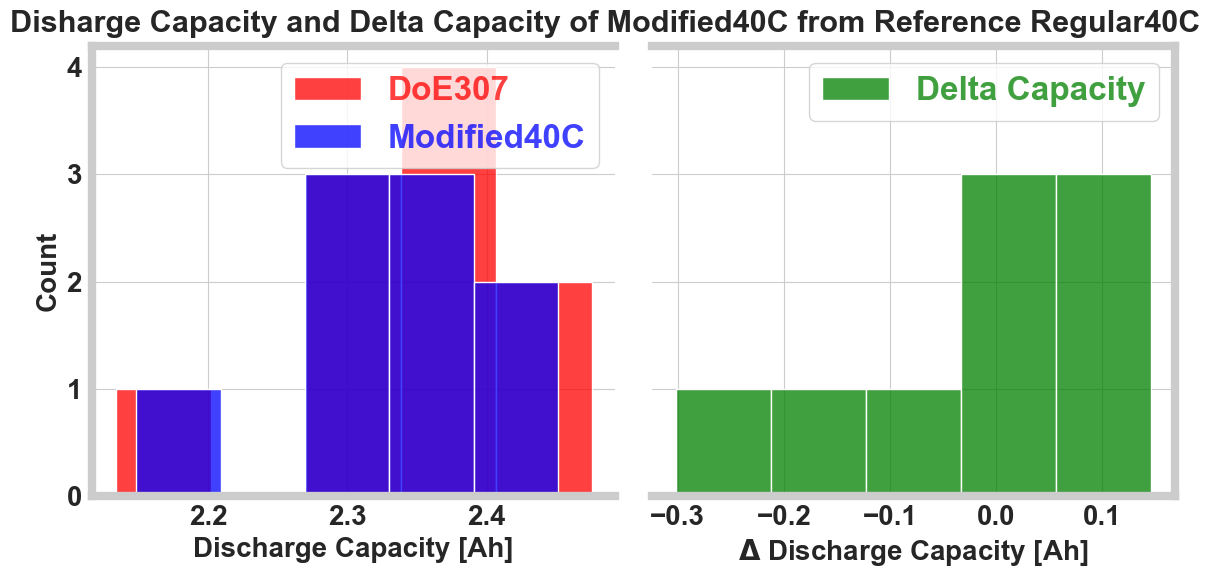

In [216]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6), sharey = True)
ax = ax.flatten()
sns.histplot(data = regular40c_charge_capacity, x = 'capacity', color = 'red', label = 'DoE307', ax = ax[0])
sns.histplot(data = modified40c_charge_capacity, x = 'capacity', color = 'blue', label = 'Modified40C', ax = ax[0])
ax[0].legend(labelcolor = 'linecolor')
sns.histplot(x = modified40c_charge_capacity['capacity'] - regular40c_charge_capacity['capacity'], color = 'green', label = 'Delta Capacity', ax = ax[1])
ax[1].legend(labelcolor = 'linecolor')
ax[0].set_xlabel('Discharge Capacity [Ah]')
ax[1].set_xlabel('$\Delta$ Discharge Capacity [Ah]')
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
plt.tight_layout()
plt.suptitle("Disharge Capacity and Delta Capacity of Modified40C from Reference Regular40C", fontsize = 22)
plt.subplots_adjust(top = 0.92)


#### Min/Max/Delta Temerature

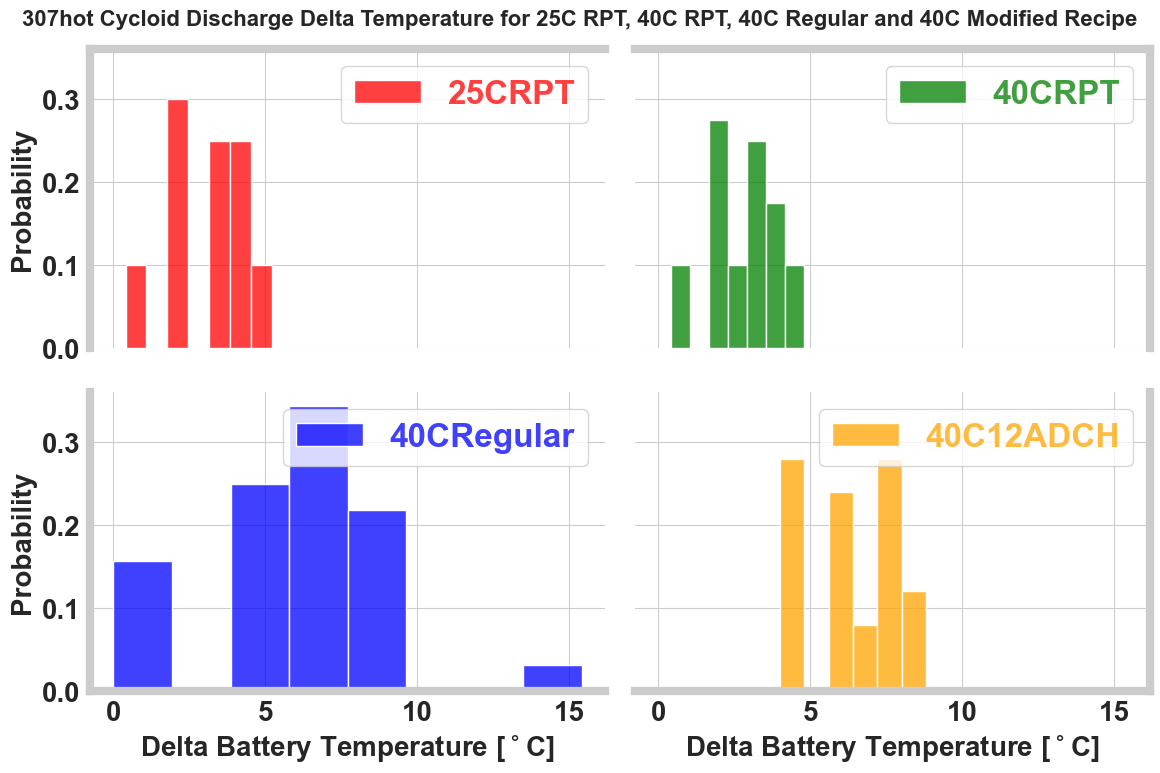

In [180]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8), sharex = True, sharey = True)
ax = ax.flatten()
data = data[data['delta_temp'] > 0]
sns.histplot(data = rpt25c[rpt25c.cycling_substate == 'DISCHARGE'], x = 'delta_temp', label = '25CRPT', stat = 'probability', color = 'red', ax = ax[0])
sns.histplot(data = rpt40c[rpt40c.cycling_substate == 'DISCHARGE'], x = 'delta_temp', label = '40CRPT', stat = 'probability', color = 'green', ax = ax[1])
sns.histplot(data = regular40c[regular40c.cycling_substate == 'CHARGE'], x = 'delta_temp', label = '40CRegular', stat = 'probability', color = 'blue', ax = ax[2])
sns.histplot(data = modified40c[modified40c.cycling_substate == 'CHARGE'], x = 'delta_temp', label = '40C12ADCH', stat = 'probability', color = 'orange', ax = ax[3])
for i in range(4):
    ax[i].legend(labelcolor = 'linecolor')
    ax[i].set_xlabel ('Delta Battery Temperature [$^\circ$C]')
ax[0].spines[['right', 'bottom']].set_visible(False)
ax[1].spines[['left', 'bottom']].set_visible(False)
ax[2].spines[['top', 'right']].set_visible(False)
ax[3].spines[['left', 'top']].set_visible(False)
plt.tight_layout()
plt.suptitle("307hot Cycloid Discharge Delta Temperature for 25C RPT, 40C RPT, 40C Regular and 40C Modified Recipe", fontsize = 16)
plt.subplots_adjust(top = 0.93)


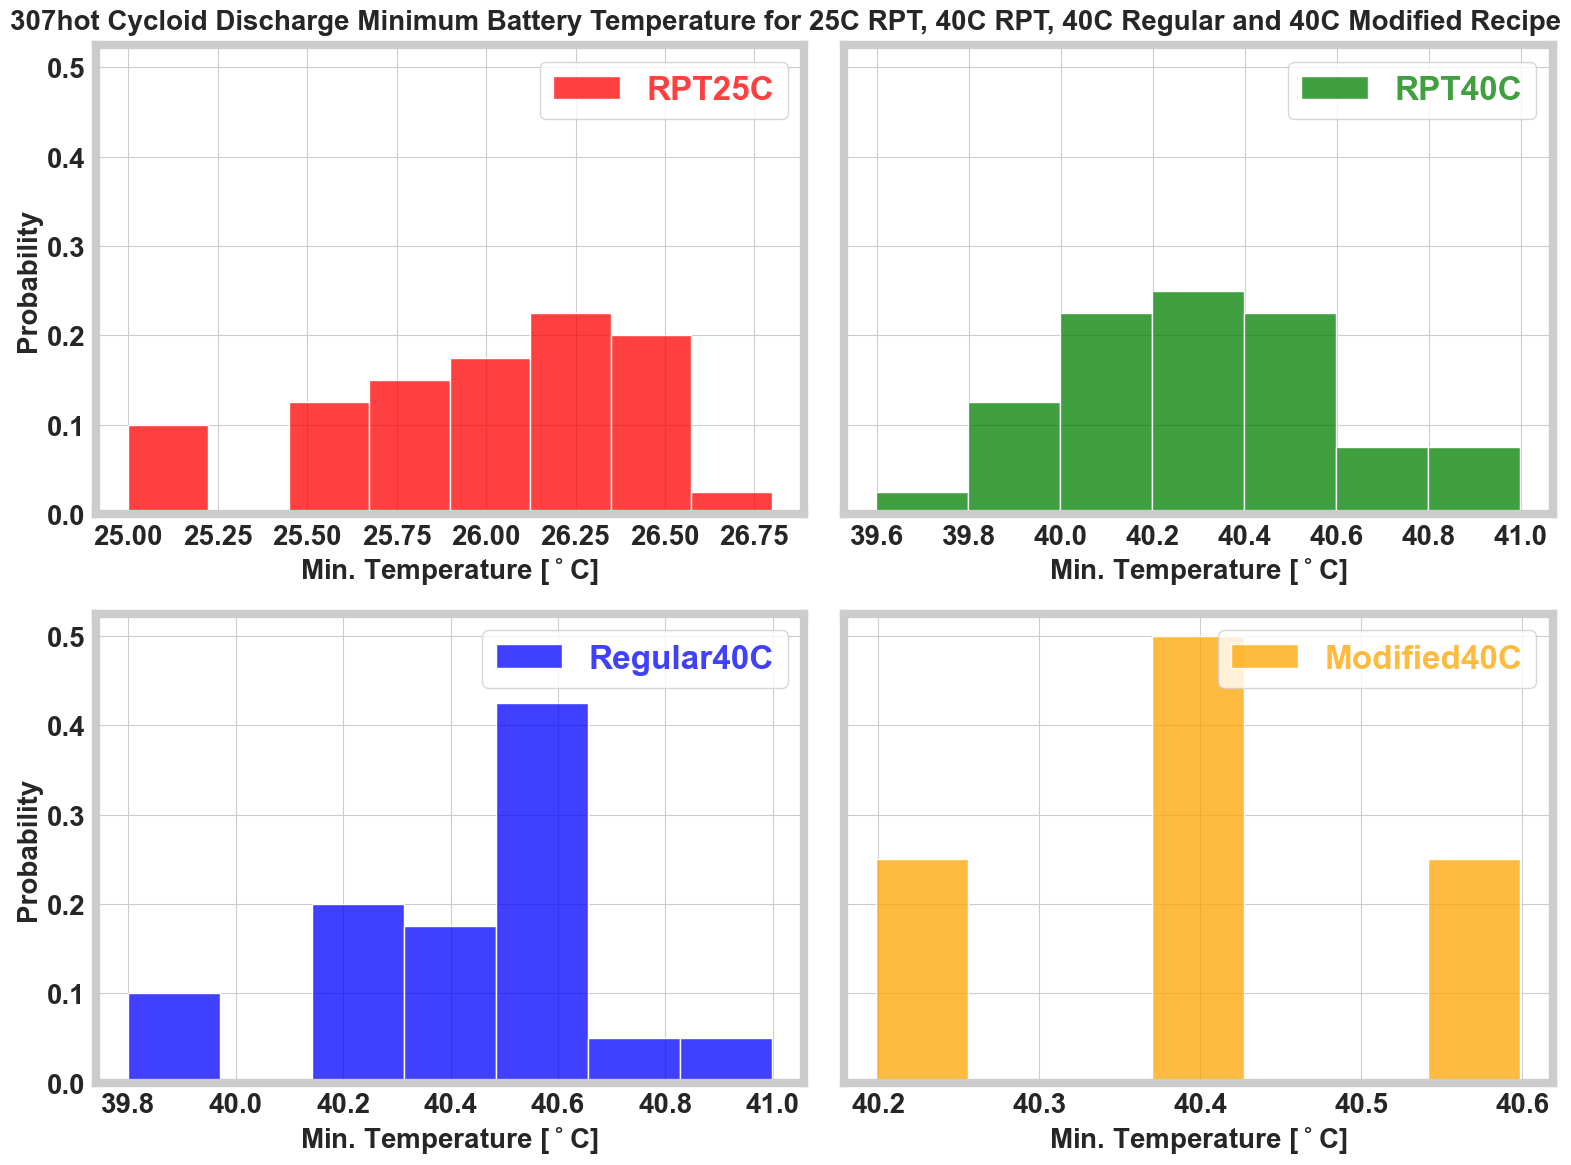

In [214]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12), sharey = True)
ax = ax.flatten()
sns.histplot(data = rpt25c[rpt25c['cycling_substate'] == 'DISCHARGE'], x = 'min_temp', label = 'RPT25C', stat= 'probability', color = 'red', ax = ax[0])
sns.histplot(data = rpt40c[rpt40c['cycling_substate'] == 'DISCHARGE'], x = 'min_temp', label = 'RPT40C', stat= 'probability', color = 'green', ax = ax[1])
sns.histplot(data = regular40c[regular40c['cycling_substate'] == 'DISCHARGE'], x = 'min_temp', label = 'Regular40C', stat= 'probability', color = 'blue', ax = ax[2])
sns.histplot(data = modified40c[modified40c['cycling_substate'] == 'DISCHARGE'], x = 'min_temp', label = 'Modified40C', stat= 'probability', color = 'orange', ax = ax[3])
for i in range(4):
    ax[i].set_xlabel("Min. Temperature [$^\circ$C]")
    ax[i].legend(labelcolor = 'linecolor')
plt.tight_layout()
plt.suptitle("307hot Cycloid Discharge Minimum Battery Temperature for 25C RPT, 40C RPT, 40C Regular and 40C Modified Recipe", fontsize = 20)
plt.subplots_adjust(top = 0.95)

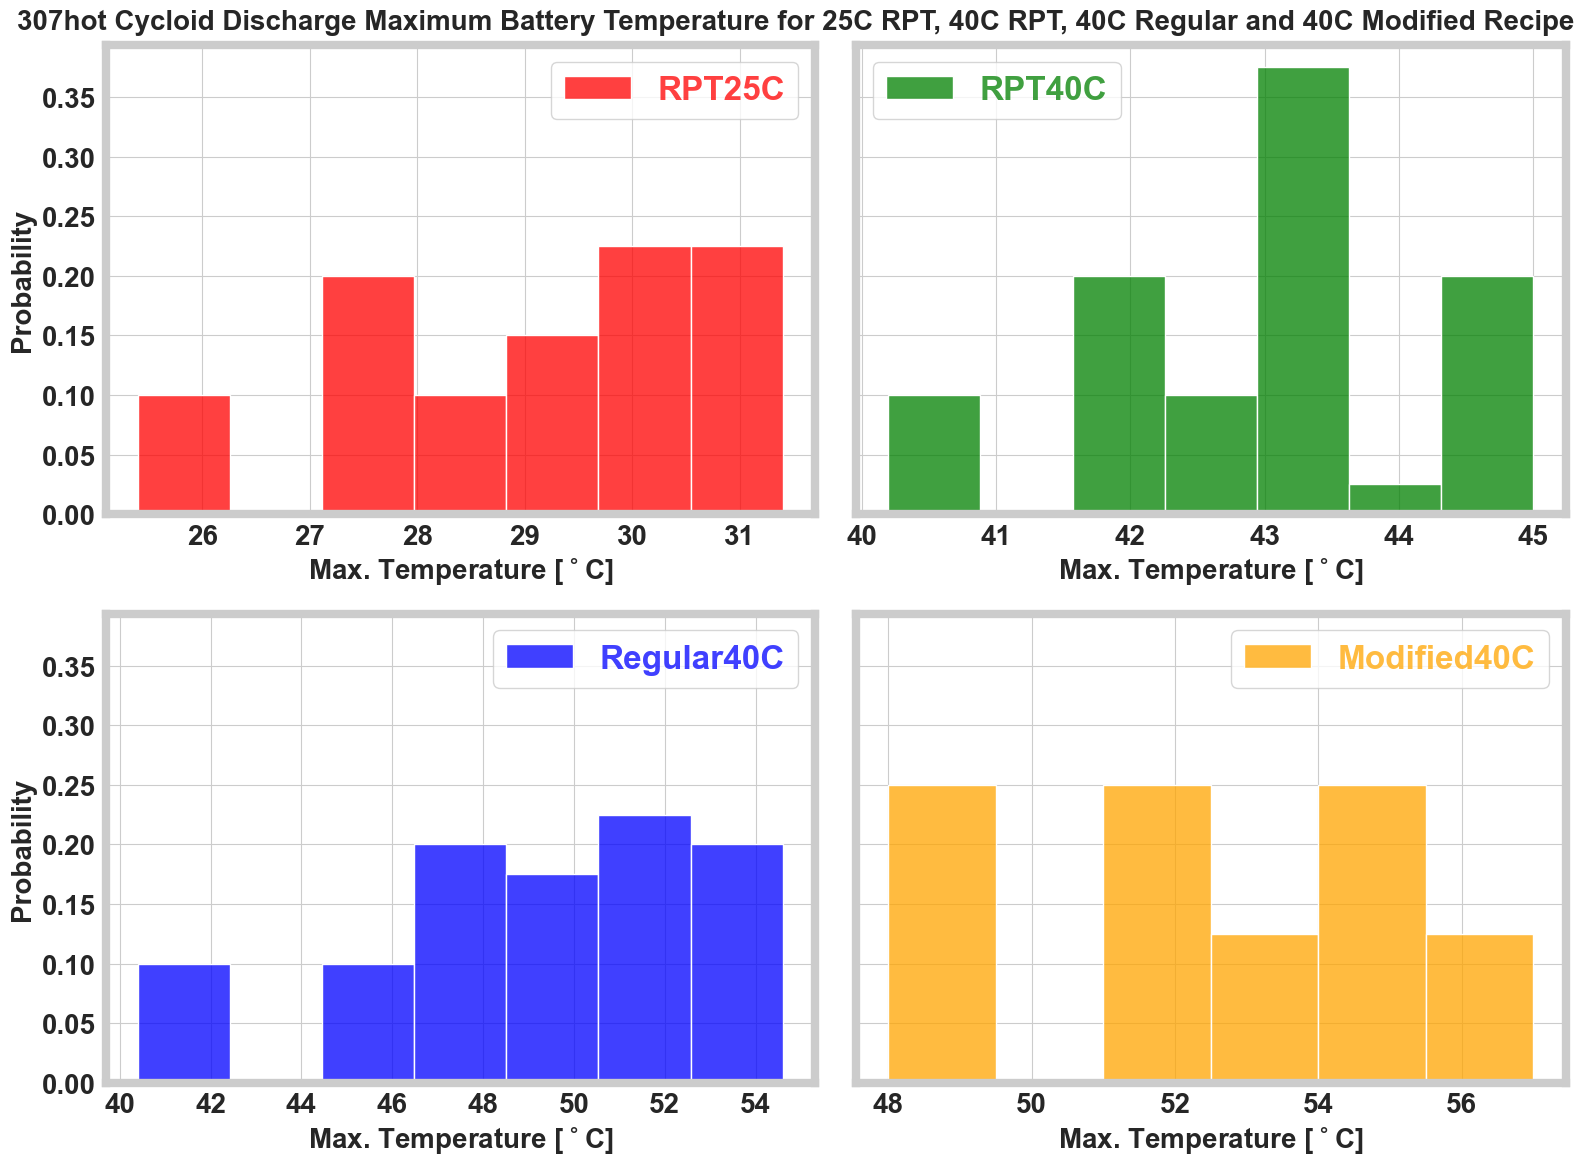

In [215]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12), sharey = True)
ax = ax.flatten()
sns.histplot(data = rpt25c[rpt25c['cycling_substate'] == 'DISCHARGE'], x = 'max_temp', label = 'RPT25C', stat= 'probability', color = 'red', ax = ax[0])
sns.histplot(data = rpt40c[rpt40c['cycling_substate'] == 'DISCHARGE'], x = 'max_temp', label = 'RPT40C', stat= 'probability', color = 'green', ax = ax[1])
sns.histplot(data = regular40c[regular40c['cycling_substate'] == 'DISCHARGE'], x = 'max_temp', label = 'Regular40C', stat= 'probability', color = 'blue', ax = ax[2])
sns.histplot(data = modified40c[modified40c['cycling_substate'] == 'DISCHARGE'], x = 'max_temp', label = 'Modified40C', stat= 'probability', color = 'orange', ax = ax[3])
for i in range(4):
    ax[i].set_xlabel("Max. Temperature [$^\circ$C]")
    ax[i].legend(labelcolor = 'linecolor')
plt.tight_layout()
plt.suptitle("307hot Cycloid Discharge Maximum Battery Temperature for 25C RPT, 40C RPT, 40C Regular and 40C Modified Recipe", fontsize = 20)
plt.subplots_adjust(top = 0.95)
plt.subplots_adjust(top = 0.95)